In [39]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2 as cv
import os

In [ ]:
def accumulateur(img, min_rad = 10, max_rad = 100, raduis_step = 1):
    """
    Given a binary image img, this function returns the coordinates of circles 
    detect(with a raduis in [min_rad; max_rad])
    """
    W, H = np.shape(img)[0:2]

    Acc = np.zeros((W,H,int(np.sqrt(W**2+H**2)))) # x y r
    for i in range(W):
        for j in range(H):
            if img[i,j][0] == 255:
                for r in range(min_rad, max_rad, 1): # raduis step is 1 pixel
                    for theta in np.linspace(0,2*np.pi,100):
                        x_vote = i + int(r*np.cos(theta))
                        y_vote = j + int(r*np.sin(theta))
                        r_vote = r
                        if x_vote < W and y_vote < H:  #if the voted point is inside the image
                            Acc[x_vote, y_vote, r] += 1
    return Acc
def circles_from_accumulator(Acc, num_circles, r_exclusion = 10, x_exclusion = 10, y_exclusion = 10):
    """
        Array[int], int, int, int, int -> List[(int, int, int)] 

    From the calculated accumulator this function returns 
    a liste of circles (x,y,r)
        - x and y are the coordinates of it's center 
        - r it's raduis
    since we might find multile maximums for the same circle, we only take in account the one with the most vote
    and we exclude the rest of them , the parameters of exclusion are:
        - rad_exclusion 
        - x_exclusion 
        - y_exclusion 
        
              """
    circles = [] #list of circles (x_center , y_center, raduis)
    Acc_copy = np.copy(Acc)
    for i in range(num_circles):

        coords_max = np.unravel_index(np.argmax(Acc_copy), Acc_copy.shape)
        y_c,x_c,r_c = coords_max
        circles.append((x_c,y_c,r_c))

        #removing the voted points in the region of the center
        
        Acc_copy[y_c - y_exclusion : y_c + y_exclusion,x_c - x_exclusion : x_c + x_exclusion, r_c - r_exclusion : r_c + r_exclusion] = 0
    return circles


circle_edges_00.png
circle_edges_06.png
circle_edges_07.png
circle_edges_03.png
circle_edges_01.png
circle_edges_05.png
circle_edges_09.png
circle_edges_02.png
circle_edges_08.png
circle_edges_04.png


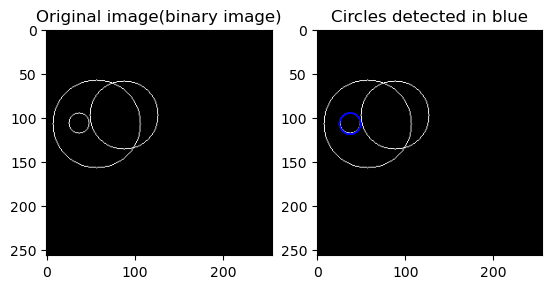

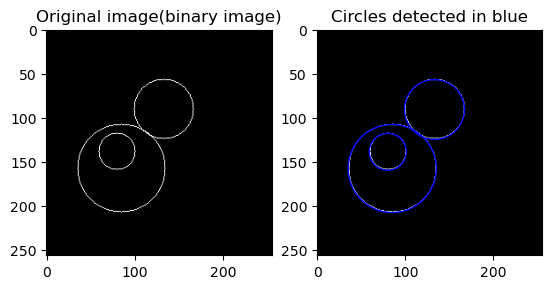

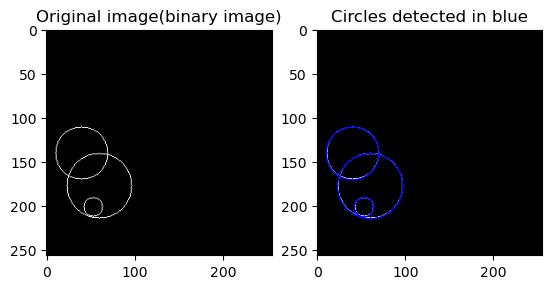

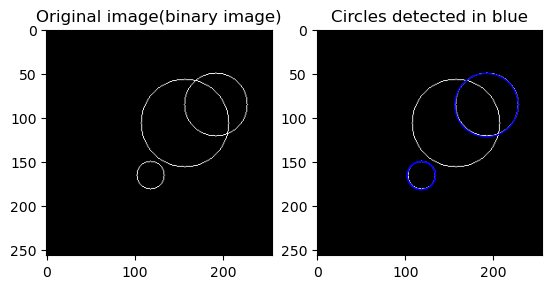

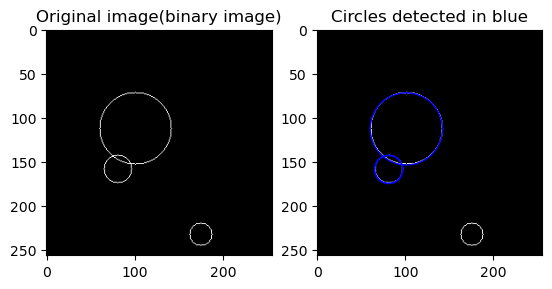

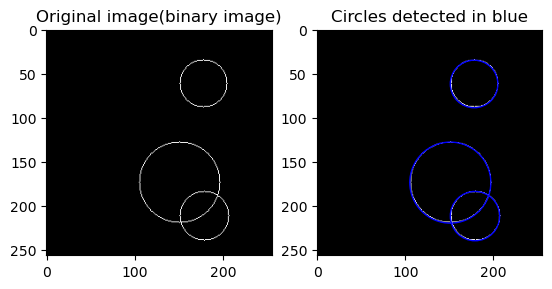

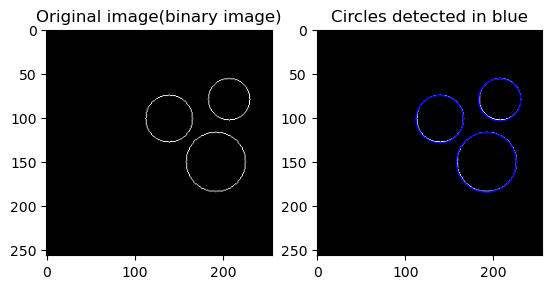

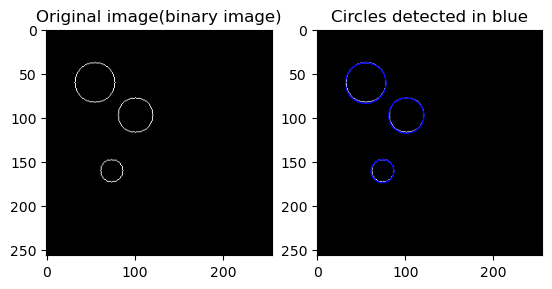

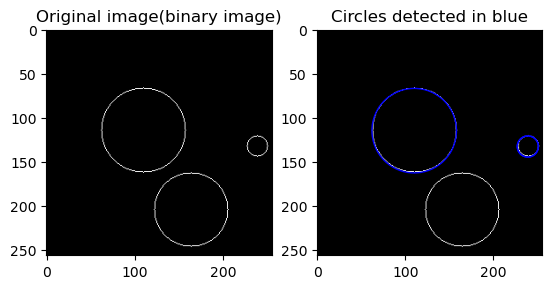

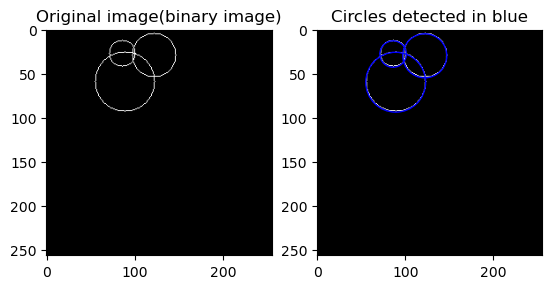

In [ ]:

images = [f for f in os.listdir('./circle_edges_dataset') if f.endswith(('jpg', 'png', 'jpeg'))]

for img_path in images:
    img = cv.imread('./circle_edges_dataset/'+img_path)
    print(img_path)
    Acc = accumulateur(img)
    circles = circles_from_accumulator(Acc, 3)
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(img)
    ax1.set_title("Original image(binary image)")
    ax2.set_title("Circles detected in blue")

    for circle in circles :
        (x_c,y_c) = (circle[0],circle[1])
        r_c = circle[2]
        ax2.imshow(img)
        ax2.add_patch(plt.Circle((x_c, y_c),r_c,fill = False, color = 'blue'))
    plt.savefig(f"result_images/result_{img_path}.pdf")
